In [157]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sys
import warnings
import seaborn as sns
from matplotlib import pyplot as plt

if not sys.warnoptions:
    warnings.simplefilter("ignore")

np.random.seed(6)
data = pd.read_csv("q3.csv",header=None)
#display(data)
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:54], data.iloc[:,54], test_size=0.2,shuffle=True)

In [158]:
# tune the parameter of C with  grid_search
np.random.seed(6)
def svc_param_selection(X, y, nfolds):
    C = [0.1, 1, 10, 100, 1000] #try different values for C
    param_grid = {'C': C}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

print ("The best value for C is:",svc_param_selection(X_train, y_train, 10))

svc = SVC(C=1)
svc.fit(X_train,y_train)
prediction = svc.predict(X_test)
result = confusion_matrix(y_pred=prediction, y_true=y_test)
accuracy_SVM = np.sum(np.diagonal(result))/len(prediction)
print ("The confusion matrix is:\n",result)
print ("The accuracy of SVM is:",accuracy_SVM)

The best value for C is: {'C': 1}
The confusion matrix is:
 [[20  0]
 [ 3 11]]
The accuracy of SVM is: 0.9117647058823529


In [91]:
# Neural network
np.random.seed(6)
ANN = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2))
ANN.fit(X_train, y_train)
prediction = ANN.predict(X_test)
result = confusion_matrix(y_pred=prediction, y_true=y_test)
accuracy_ANN = np.sum(np.diagonal(result))/len(prediction)
print ("The confusion matrix is:\n",result)
print ("The accuracy of Neural Network is:",accuracy_ANN)

The confusion matrix is:
 [[13  7]
 [ 2 12]]
The accuracy of Neural Network is: 0.7352941176470589


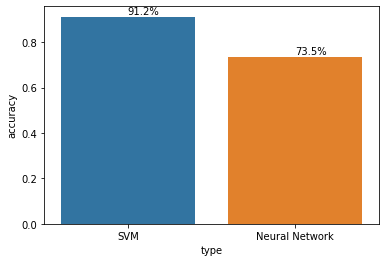

In [92]:
x=[1,2]
y=[accuracy_SVM,accuracy_ANN]
data = pd.DataFrame(np.array([x,y]).T)
data.rename(columns={0:"type",1:"accuracy"},inplace=True)
data["type"] = data["type"].astype('category')

p1 = sns.barplot(x="type", y="accuracy", data=data)
for index, row in data.iterrows():
    p1.text(row.type-1,row.accuracy+0.01,str(round(row.accuracy,3)*100)+"%")
p1.set(xticklabels=['SVM','Neural Network'])
plt.show()

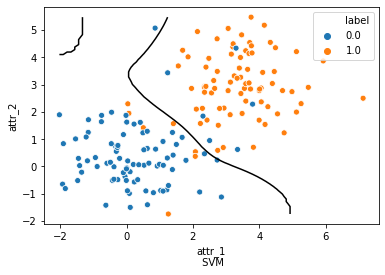

In [129]:
# draw the decision boundary for SVM
data = pd.read_csv('q3.csv',header = None)
data_sub = data.iloc[:,[0,1,-1]]
data_sub.rename(columns={0:'attr_1',1:'attr_2',54:'label'},inplace =True)

# navie bayes with GaussianNB
svc = SVC(C=1, probability = True)
svc.fit(data_sub[['attr_1','attr_2']],data_sub['label'])

xlim = (data_sub['attr_1'].min(), data_sub['attr_1'].max())
ylim = (data_sub['attr_2'].min(), data_sub['attr_2'].max())
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 80),
                     np.linspace(ylim[0], ylim[1], 80))
Z = svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

p1 = sns.scatterplot(x='attr_1',y='attr_2',hue='label',data=data_sub)

p1.contour(xx, yy, Z, [0.5], colors='k')

p1.set_xlabel('attr_1\n SVM')
p1.set_ylabel('attr_2')

plt.show()

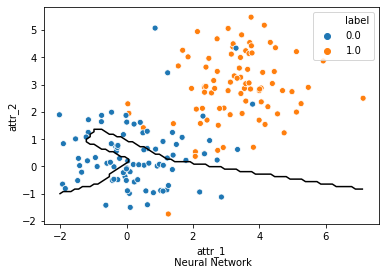

In [130]:
# navie bayes with GaussianNB
ANN = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2))
ANN.fit(data_sub[['attr_1','attr_2']],data_sub['label'])

xlim = (data_sub['attr_1'].min(), data_sub['attr_1'].max())
ylim = (data_sub['attr_2'].min(), data_sub['attr_2'].max())
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 80),
                     np.linspace(ylim[0], ylim[1], 80))
Z = ANN.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

p1 = sns.scatterplot(x='attr_1',y='attr_2',hue='label',data=data_sub)

p1.contour(xx, yy, Z, [0.5], colors='k')

p1.set_xlabel('attr_1\n Neural Network')
p1.set_ylabel('attr_2')

plt.show()

In [140]:
# Problem 2

data = pd.read_csv("data.dat", sep='\s+',header=None).T
label = pd.read_csv("label.dat",sep='\s+',header=None).T
label.rename(columns={0:"label"},inplace=True)
label['label'][label['label']==2.0]=0
label['label'][label['label']==6.0]=1


X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,shuffle=True)

In [151]:
# SVM
print ("The best value for C is:",svc_param_selection(X_train, y_train, 10))
np.random.seed(6)
svc = SVC(C=10)
svc.fit(X_train, y_train['label'])
prediction = svc.predict(X_test)
result = confusion_matrix(y_true=y_test, y_pred=prediction, labels=[0,1])
accuracy_SVM = np.sum(np.diagonal(result))/np.sum(result)
print (result)
print ("The accuracy of Naive Bayes is "+str(round(accuracy_SVM,3)*100)+"%")

The best value for C is: {'C': 10}
[[186   4]
 [  4 204]]
The accuracy of Naive Bayes is 98.0%


In [152]:
# Neural network
np.random.seed(6)
ANN = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2))
ANN.fit(X_train, y_train['label'])
prediction = ANN.predict(X_test)
result = confusion_matrix(y_pred=prediction, y_true=y_test)
accuracy_ANN = np.sum(np.diagonal(result))/len(prediction)
print ("The confusion matrix is:\n",result)
print ("The accuracy of Neural Network is:",accuracy_ANN)

The confusion matrix is:
 [[186   4]
 [  5 203]]
The accuracy of Neural Network is: 0.9773869346733668


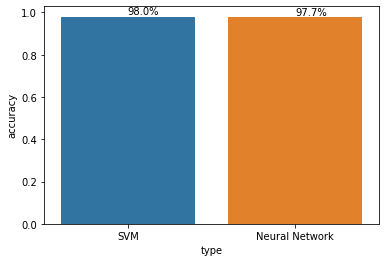

In [153]:
x=[1,2]
y=[accuracy_SVM,accuracy_ANN]
data = pd.DataFrame(np.array([x,y]).T)
data.rename(columns={0:"type",1:"accuracy"},inplace=True)
data["type"] = data["type"].astype('category')

p1 = sns.barplot(x="type", y="accuracy", data=data)
for index, row in data.iterrows():
    p1.text(row.type-1,row.accuracy+0.01,str(round(row.accuracy,3)*100)+"%")
p1.set(xticklabels=['SVM','Neural Network'])
plt.show()

[[195   7]
 [  5 191]]
The accuracy of Naive Bayes is 97.0%


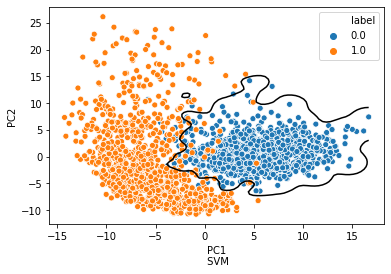

In [165]:
# read in data
data = pd.read_csv("data.dat", sep='\s+',header=None).T
std = StandardScaler()
data = std.fit_transform(data)
label = pd.read_csv("label.dat",sep='\s+',header=None).T
label.rename(columns={0:"label"},inplace=True)
label['label'][label['label']==2.0]=0
label['label'][label['label']==6.0]=1

#data = pd.concat([pd.DataFrame(data),label],axis=1)
pca = PCA(n_components=2)
data = pca.fit_transform(data)

new = pd.concat([pd.DataFrame(data),label],axis=1)
# split original data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,shuffle=True)

# navie bayes with GaussianNB
svc = SVC(C=10, probability=True)
svc.fit(X_train, y_train['label'])
prediction = svc.predict(X_test)
result = confusion_matrix(y_true=y_test, y_pred=prediction)
accuracy_NB = np.sum(np.diagonal(result))/np.sum(result)
print (result)
print ("The accuracy of Naive Bayes is "+str(round(accuracy_NB,3)*100)+"%")


xlim = (data[:,0].min(), data[:,0].max())
ylim = (data[:,1].min(), data[:,1].max())
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 80),
                     np.linspace(ylim[0], ylim[1], 80))
Z = svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

p1 = sns.scatterplot(x=0,y=1,hue='label',data=new)

p1.contour(xx, yy, Z, [0.5], colors='k')

p1.set_xlabel('PC1\n SVM')
p1.set_ylabel('PC2')

plt.show()

[[208   0]
 [  7 183]]
The accuracy of Naive Bayes is 98.2%


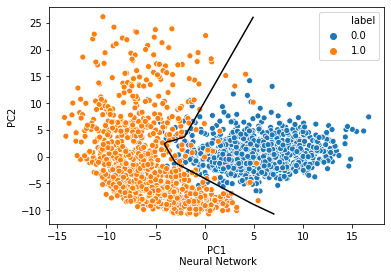

In [164]:
ANN = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2))
ANN.fit(X_train, y_train['label'])
prediction = ANN.predict(X_test)
result = confusion_matrix(y_true=y_test, y_pred=prediction)
accuracy_NB = np.sum(np.diagonal(result))/np.sum(result)
print (result)
print ("The accuracy of Naive Bayes is "+str(round(accuracy_NB,3)*100)+"%")


xlim = (data[:,0].min(), data[:,0].max())
ylim = (data[:,1].min(), data[:,1].max())
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 80),
                     np.linspace(ylim[0], ylim[1], 80))
Z = ANN.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

p1 = sns.scatterplot(x=0,y=1,hue='label',data=new)

p1.contour(xx, yy, Z, [0.5], colors='k')

p1.set_xlabel('PC1\n Neural Network')
p1.set_ylabel('PC2')

plt.show()